# Lab 5 Gradient Descent

In this part of the lab we will use gradient descent to fit a simple linear regression model.  You should browse the code in `simple_linear_regression.py` and `gradientdescent.py`.

In [1]:
# notebook magic to display plots
%matplotlib inline
# notebook magic to auto reload imported modules when changes are made to them 
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import simple_linear_regression as slr
import gradientdescent as gd
import lab5

In [3]:
import os
import sys
# check that DSFS code has been cloned
assert os.path.exists('/vagrant/data-science-from-scratch/code/')  
sys.path.append('/vagrant/data-science-from-scratch/code/')   # add code from textbook to path
import working_with_data as wwd

## Loading the dataset

For this part of the lab we will look at data about sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [4]:
# let's load the data
data = lab5.load_ad_data()
print 'Dataset columns:', ','.join(data[0].keys())

Dataset columns: TV,Newspaper,Radio,Sales,Row


In [5]:
tv = wwd.pluck('TV', data)
sales = wwd.pluck('Sales', data)

Let's look at the relationship between the TV ad budget and sales.

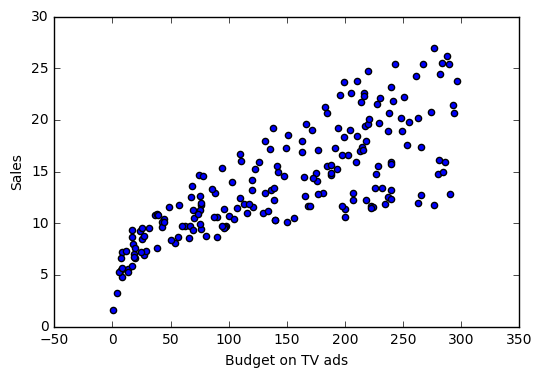

In [6]:
plt.scatter(tv, sales)
plt.xlabel('Budget on TV ads')
plt.ylabel('Sales')

## Computing the cost function

Let's compute the cost function.  Examine lab5.py to make sense of the following functions.  

In [7]:
J = slr.make_cost_function(tv, sales)

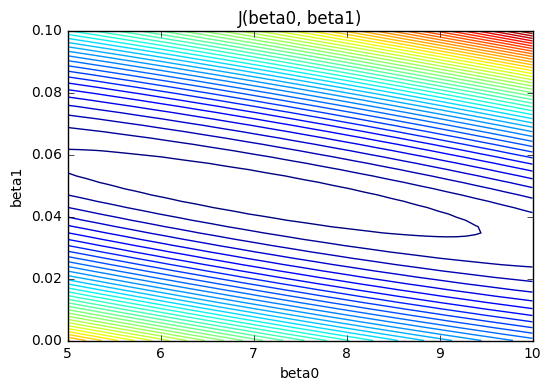

In [8]:
slr.make_contour_plot(J)

The cost function appears to be minimized right around $\beta_0 = 7.03$ and $\beta_1 = 0.475$.


In [9]:
J([7.03, 0.0475])

2102.5452924375004

In your own words, what is J(beta0, beta1) computing?  (You may want to look at the `lab5` code as well as your notes from reading, class).

**YOUR ANSWER HERE**:  *todo: replace this with your answer*

## Computing the gradient

Let's calculate the gradient at the point $\beta_0 = 0$ and $\beta_1 = 0$.  

In [10]:
gradient_fn = slr.make_gradient(tv, sales)
gradient_fn([0,0])

(-5609.000000000001, -964216.6799999998)

What does the answer tell you?  To be more specific, given the current settings of $\beta_0, \beta_1$, if I want to *reduce* my sum of squared error...

- should I increase or decrease $\beta_0$? 
- should I increase or decrease $\beta_1$?  
- which one, $\beta_0$ or $\beta_1$ will have a larger effect on lowering the error?

**YOUR ANSWER HERE**:  *todo: replace this with your answer*

## Gradient descent

Now you will run gradient descent to find the $\beta_0$ and $\beta_1$ that minimizes sum of squared error on this particular dataset.

To run gradient descent, you must choose the step size.  Welcome to the dark art of numerical optimization!  If you are unsure of the role that step size plays in GD, take some time now to review the code, the book, class notes, etc.

This particular implementation of GD lets you specify more than step size and it will try them all and pick whichever is best in each iteration.

Generally speaking, GD should take large steps at the beginning and then make progressively smaller steps.  Thus, the *largest* step size you should consider is one that is appropriate for the *first* step and then you should include some smaller step sizes too.

The following code invokes GD with only a single step size of 1 and for only one iteration.  Hint: a step size of 1 is *way* too big for this problem.  Run it and see what value of `beta0` and `beta1` it returns.  Does it look familiar?  I.e., have you seen those numbers before?

**TODO** Make the following modifications to GD:

- Choose an appropriate set of step sizes
- Increase the maximum number of iterations
- Modify `minimize_batch` so that it records information while it runs (you can store the info in the `stats` dictionary that is passed in as an argument).  In particular, in each iteration, record the value of the target function.  You may wish to record other statistics too.

Your goal is to use GD to find the best fit linear regression model (or pretty close to it).

In [11]:
gd_stats = {}    
step_sizes = [1.0]   # todo: initialize this
theta = gd.minimize_batch(target_fn=J, 
                          gradient_fn=gradient_fn, 
                          theta_0=(0,0), 
                          max_iterations=1, 
                          step_sizes=step_sizes, 
                          stats=gd_stats)
beta0, beta1 = theta
print "Gradient descent returns beta0 =", beta0, "and beta1 =", beta1

Executing iteration 0
Gradient descent returns beta0 = 5609.0 and beta1 = 964216.68


**TODO** Produce a plot in which iteration number is on the x-axis and the y-axis is the value of the target function (in this case the cost function J) at that iteration.  Your plot can *skip* some of the earliest iterations which have super high cost or alternatively you can limit the y-axis so that it is at most around 6000.  Your plot should have clearly labeled axes.

In [12]:
# todo: your code here

## Stochastic gradient descent

Now let's try stochastic gradient descent.  As you can see from the function call below, the target function and gradient function for SGD are different from those used in GD.

In your own words, what does the specified gradient function, `slr.gradient_for_point` for SGD compute?

**YOUR ANSWER HERE**:  *todo: replace this with your answer*

**TODO** Make the following modifications to GD:

- Modify `minimize_stochastic` so that it records information while it runs (you can store the info in the `stats` dictionary).  In particular, in each iteration, record the *current* value of the target function as well as the *minimum* value seen so far.  You may wish to record other statistics too.

In [13]:
sgd_stats={}
step_size = 1./10**5  # suggested step size
theta = gd.minimize_stochastic(target_fn=slr.cost_for_point, 
                               gradient_fn=slr.gradient_for_point, 
                               x=tv, 
                               y=sales, 
                               theta_0=(0,0), 
                               alpha_0=step_size, 
                               max_iterations=100000,  # suggested value
                               stats=sgd_stats)
beta0, beta1 = theta
print "Gradient descent returns beta0 =", beta0, "and beta1 =", beta1

Went 100 iterations with no improvement, stopping
Gradient descent returns beta0 = 6.94848638005 and beta1 = 0.0479876680801


**TODO** Produce a plot in which iteration number is on the x-axis and the y-axis is the value of the target function (in this case the cost function J) at that iteration.  In addition, plot the minimum value seen so far at each iteration.  Follow the same guidelines as with the previous plot.

In [14]:
# todo: your code here

Briefly explain any differences you observe between this figure and the similar figure you created for GD.  In particular,

- Which one converges faster?  
- Why is it important that SGD algorithm tracks the minimum value of the target function?

**YOUR ANSWER HERE**:  *todo: replace this with your answer*

## Use gradient descent to fit a different model

Now use gradient descent to fit a simple linear regression model predicting sales as a function of the radio advertisement budget.

**TODO** Write your code here:

In [15]:
# todo: replace this with your code

Plot the data as well as the best fit line that GD found.

**TODO** Write your code here:

In [16]:
# todo: replace this with your code

## Challenge problem

Modify the `gradient_descent` code to support multiple linear regression and try it out on all three predictor variables in this dataset.